In [ ]:
# !pip install keras==1.2.2
# !pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 13.5 MB/s 
     |████████████████████████████████| 2.8 MB 52.3 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=5b70832760343917a81909b30ee1678982b2adcb002479a1e464e0a3d4b2f142
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=dd1b0469649d3d0512857f9d38d3f9d3235217f60a22dff524e5cba7cf403e6c
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [ ]:
# univariate LSTM Model 
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# define input sequence
raw_seq = [12000, 15000, 13000, 15000, 13500, 14000, 15000, 17000, 14000]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

array([15000, 13500, 14000, 15000, 17000, 14000])

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# [batch, sequence, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(6, 3, 1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, nb_epoch=1000)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1000





6/6 [==============================] - 0s - loss: 381760000.0000
Epoch 2/1000
6/6 [==============================] - 0s - loss: 377658080.0000
Epoch 3/1000
6/6 [==============================] - 0s - loss: 366878048.0000
Epoch 4/1000
6/6 [==============================] - 0s - loss: 349342688.0000
Epoch 5/1000
6/6 [==============================] - 0s - loss: 369103264.0000
Epoch 6/1000
6/6 [==============================] - 0s - loss: 389739872.0000
Epoch 7/1000
6/6 [==============================] - 0s - loss: 376646656.0000
Epoch 8/1000
6/6 [========================

In [ ]:
# demonstrate prediction
x_input = array([14000, 15000, 17000])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[16020.708]]


In [ ]:
# # !pip install pandas
# !pip install keras==1.2.2
# !pip install tensorflow==1.15.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/stock_price_predictions'

Mounted at /content/drive
/content/drive/MyDrive/stock_price_predictions


In [ ]:
# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
input_file="DIS.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')


In [ ]:
df.head()

,0,1,2,3,4,5,6
0,1996-12-31,23.011177,23.175543,22.805719,22.928993,17.804647,2719200
1,1997-01-02,22.928993,22.970085,21.942801,22.148258,17.198397,8115400
2,1997-01-03,22.394806,22.805719,22.394806,22.764629,17.677013,4650000
3,1997-01-06,22.764629,22.928993,22.559172,22.682446,17.613201,3623300
4,1997-01-07,22.682446,22.682446,22.435898,22.641354,17.581289,3606200


In [ ]:
# take close price column[5]
all_y = df[5].values

print('closing_prices : ', all_y)
print('Initial dataset Shape : ', all_y.shape)

# reshapping data and creating dataset
dataset=all_y.reshape(-1, 1)
print('Transpose on y axis : ', dataset.shape)


closing_prices :  [ 17.804647  17.198397  17.677013 ... 102.703629 102.959648 102.624855]
Initial dataset Shape :  (5035,)
Transpose on y axis :  (5035, 1)


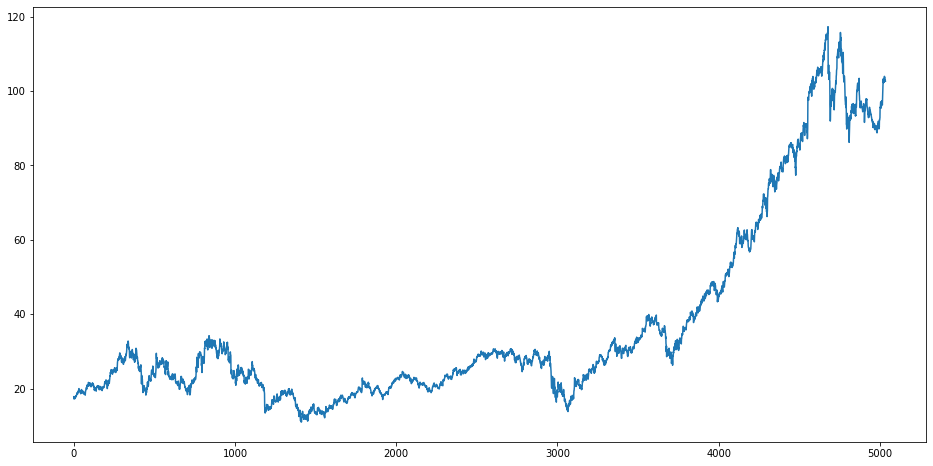

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(dataset)
plt.show()

In [ ]:
# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets, 50% test data, 50% training data
print("Performing Train Test Split : ")
print("\tTotal data samples : ", len(dataset))
split_criteria=0.9
train_size = int(len(dataset) * split_criteria)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("\tBased on",split_criteria*100,"-",(1-split_criteria)*100,"% Split")
print("\tTraining samples are : ",train_size)
print("\tTesting samples are : ",test_size)



print("Defining input & output sequence : ")
# reshape into X=t and Y=t+1, timestep 240
look_back = 120
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("\tTotal Training Samples : ", len(trainX))
print("\tInput Sequence Size : ", trainX[0].shape)
print("\tOutput Sequence Size : ", len(trainY)/len(trainX))

print("Reshaping input to [Samples, Features, Timesteps] : ")
# reshape input to be [samples, features, timesteps]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("\tReshaped TrainX is : ", trainX.shape)
print("\tReshaped TestX is : ", testX.shape)

Performing Train Test Split : 
	Total data samples :  5035
	Based on 90.0 - 9.999999999999998 % Split
	Training samples are :  4531
	Testing samples are :  504
Defining input & output sequence : 
	Total Training Samples :  4410
	Input Sequence Size :  (120,)
	Output Sequence Size :  1.0
Reshaping input to [Samples, Features, Timesteps] : 
	Reshaped TrainX is :  (4410, 1, 120)
	Reshaped TestX is :  (383, 1, 120)


In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=240, verbose=1)
model.fit(trainX, trainY, nb_epoch=100, batch_size=240, verbose=1)


Epoch 1/100
4410/4410 [==============================] - 1s - loss: 0.0225     
Epoch 2/100
4410/4410 [==============================] - 0s - loss: 0.0028     
Epoch 3/100
4410/4410 [==============================] - 0s - loss: 0.0017     
Epoch 4/100
4410/4410 [==============================] - 0s - loss: 0.0014     
Epoch 5/100
4410/4410 [==============================] - 0s - loss: 0.0013     
Epoch 6/100
4410/4410 [==============================] - 0s - loss: 0.0012     
Epoch 7/100
4410/4410 [==============================] - 0s - loss: 0.0011     
Epoch 8/100
4410/4410 [==============================] - 0s - loss: 0.0010     
Epoch 9/100
4410/4410 [==============================] - 0s - loss: 9.9775e-04     
Epoch 10/100
4410/4410 [==============================] - 0s - loss: 8.9026e-04     
Epoch 11/100
4410/4410 [==============================] - 0s - loss: 7.8245e-04     
Epoch 12/100
4410/4410 [==============================] - 0s - loss: 7.4890e-04     
Epoch 13/100
4410/441

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
i = 1
print('Actual Value:',trainY[0][i] )
print('Actual Value:',trainPredict[i])

Actual Value: 21.130701
Actual Value: [21.210064]


In [ ]:
i = 1
print('Actual Value:',testY[0][i] )
print('Actual Value:',testPredict[i])

Actual Value: 110.20224
Actual Value: [104.81312]


In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.92 RMSE
Test Score: 2.63 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:


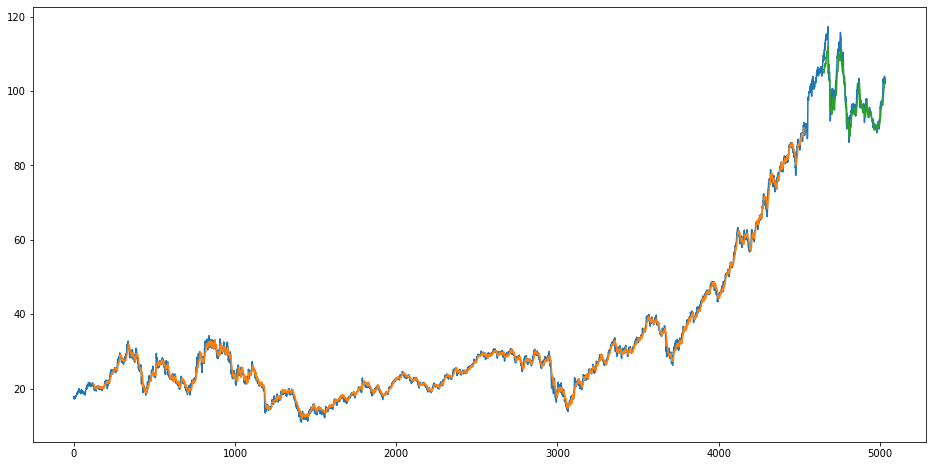

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
# plot the actual price, prediction in test, actual price=blue line
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# print('testPredictions:')
# print(testPredict)
# # export prediction and actual prices
# df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testX.reshape(-1)), decimals=2)})
# df.to_csv("lstm_result.csv", sep=';', index=None)